In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
raw_data = pd.read_excel("Hackathon Data.xlsx")

In [2]:
data_sparsity = raw_data.groupby("Encoded_SKU_ID",as_index=False)["SALES_DATE"].agg({"min":np.min,"max":np.max,"unique_non_0":lambda x:x.nunique()})

In [3]:
(raw_data.DAILY_UNITS==0).sum()/raw_data.DAILY_UNITS.shape[0]

0.17363388107229588

In [4]:
data_sparsity_2 = raw_data.groupby("Encoded_SKU_ID",as_index=False)["DAILY_UNITS"].agg({"non_0":lambda x : (x!=0).sum()})

In [5]:
data_sparsity_2

Encoded_SKU_ID  non_0
0                 1   1544
1                 2   1852
2                 3   1441
3                 4   1123
4                 5   1803
..              ...    ...
570             571    847
571             572    581
572             573    941
573             574    724
574             575    602

[575 rows x 2 columns]

In [6]:
data_sparsity = data_sparsity.merge(data_sparsity_2,on="Encoded_SKU_ID",how="left")
data_sparsity["diff"] = (data_sparsity["max"] - data_sparsity["min"]).dt.days
data_sparsity["empty_prop"] = 1 - data_sparsity["non_0"]/data_sparsity["diff"]

Text(0, 0.5, 'Number of SKUs')

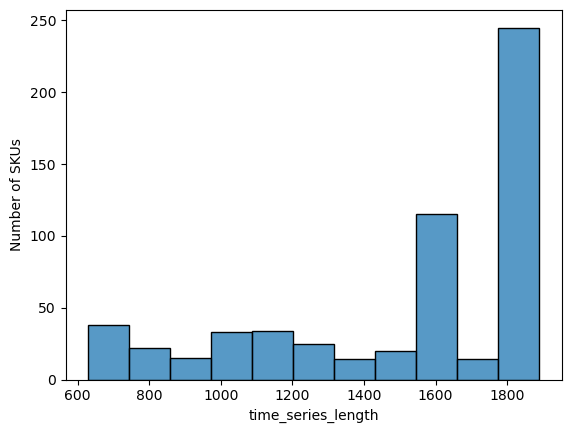

In [7]:
sns.histplot(data_sparsity.rename(columns={"diff":"time_series_length"})["time_series_length"])
plt.ylabel("Number of SKUs")

In [8]:
data_sparsity["empty_prop"].describe()

count    575.000000
mean       0.201735
std        0.169827
min       -0.001222
25%        0.055293
50%        0.150265
75%        0.315795
max        0.732102
Name: empty_prop, dtype: float64

In [9]:
(data_sparsity["empty_prop"]>.33).sum()/data_sparsity.shape[0]

0.23304347826086957

<AxesSubplot:xlabel='SALES_DATE', ylabel='DAILY_UNITS'>

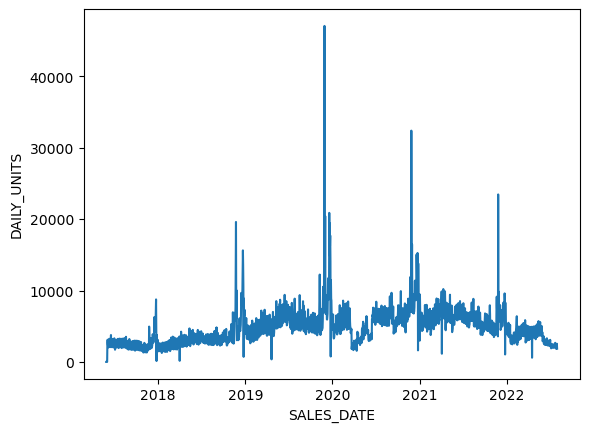

In [10]:
day_agg = raw_data.groupby("SALES_DATE",as_index=False)["DAILY_UNITS"].sum()
sns.lineplot(data= day_agg,x="SALES_DATE",y="DAILY_UNITS")

In [11]:
day_agg["year"] = day_agg["SALES_DATE"].dt.year
day_agg["month"] = day_agg["SALES_DATE"].dt.month
day_agg["day_of_week"] = day_agg["SALES_DATE"].dt.dayofweek

<AxesSubplot:xlabel='year', ylabel='DAILY_UNITS'>

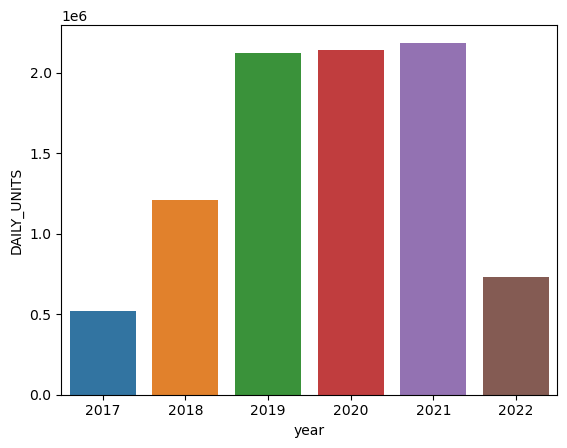

In [12]:
sns.barplot(data = day_agg.groupby("year",as_index=False)["DAILY_UNITS"].sum(),x="year",y="DAILY_UNITS")

C:\Users\saksham\AppData\Local\Temp\ipykernel_7008\2016397905.py:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=day_agg_y_m,x="month",y="DAILY_UNITS",marker="o",hue="year",palette=sns.color_palette("tab10"))


<AxesSubplot:xlabel='month', ylabel='DAILY_UNITS'>

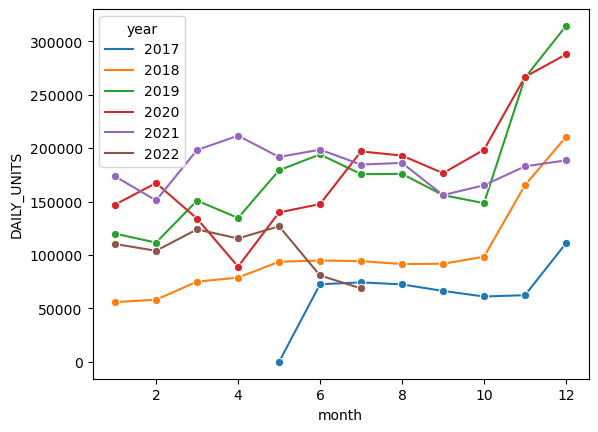

In [13]:
day_agg_y_m = day_agg.groupby(["year","month"],as_index=False)["DAILY_UNITS"].sum()
sns.lineplot(data=day_agg_y_m,x="month",y="DAILY_UNITS",marker="o",hue="year",palette=sns.color_palette("tab10"))

C:\Users\saksham\AppData\Local\Temp\ipykernel_7008\3784853583.py:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=day_agg_d,x="day_of_week",y="DAILY_UNITS",marker="o",hue="year",palette=sns.color_palette("tab10"))


<AxesSubplot:xlabel='day_of_week', ylabel='DAILY_UNITS'>

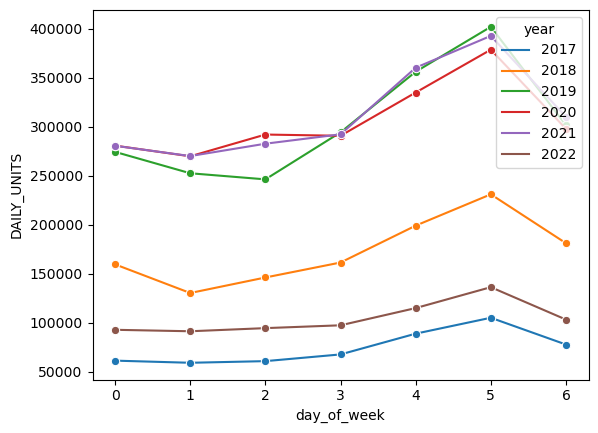

In [14]:
day_agg_d = day_agg.groupby(["year","day_of_week"],as_index=False)["DAILY_UNITS"].sum()
sns.lineplot(data=day_agg_d,x="day_of_week",y="DAILY_UNITS",marker="o",hue="year",palette=sns.color_palette("tab10"))

In [15]:
day_agg["quarter"] = np.where(day_agg.month.isin([1,2,3]),1,\
                                np.where(day_agg.month.isin([4,5,6]),2,\
                                    np.where(day_agg.month.isin([7,8,9]),3,\
                                        np.where(day_agg.month.isin([10,11,12]),4,np.nan)
                                            )
                                        )        
                                )

In [16]:
day_agg_q = day_agg.groupby(["year","quarter"],as_index=False)["DAILY_UNITS"].sum()
sns.lineplot(data=day_agg_q,x="quarter",y="DAILY_UNITS",marker="o",hue="year",palette=sns.color_palette("tab10"))

C:\Users\saksham\AppData\Local\Temp\ipykernel_7008\1355960640.py:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=day_agg_q,x="quarter",y="DAILY_UNITS",marker="o",hue="year",palette=sns.color_palette("tab10"))


<AxesSubplot:xlabel='quarter', ylabel='DAILY_UNITS'>